<a href="https://colab.research.google.com/github/meryam12/Univariate_ts_airpassenger/blob/main/Univariate_ts_airpassenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mount your drive
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [ ]:
import os
os.chdir('drive/My Drive/STAGE')
!ls

AAPL.csv
a.csv
air.csv
AirPassengers.csv
AirQualityUCImodif.csv
household_power_consumption_household_power_consumption.csv
household_power_consumption_household_power_consumption.gsheet
pollution.csv
pollution.gsheet
raw.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np
import statsmodels.api as sm
from datetime import datetime
data = pd.read_csv('AirPassengers.csv',parse_dates=['Month'], index_col='Month',date_parser=dateparse)
print(data)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
1949-06-01         135
1949-07-01         148
1949-08-01         148
1949-09-01         136
1949-10-01         119
1949-11-01         104
1949-12-01         118
1950-01-01         115
1950-02-01         126
1950-03-01         141
1950-04-01         135
1950-05-01         125
1950-06-01         149
1950-07-01         170
1950-08-01         170
1950-09-01         158
1950-10-01         133
1950-11-01         114
1950-12-01         140
1951-01-01         145
1951-02-01         150
1951-03-01         178
1951-04-01         163
1951-05-01         172
1951-06-01         178
...                ...
1958-07-01         491
1958-08-01         505
1958-09-01         404
1958-10-01         359
1958-11-01         310
1958-12-01         337
1959-01-01         360
1959-02-01         342
1959-03-01         406
1959-04-01         396
1959-05-01 

In [ ]:
d = data['Passengers']
d.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

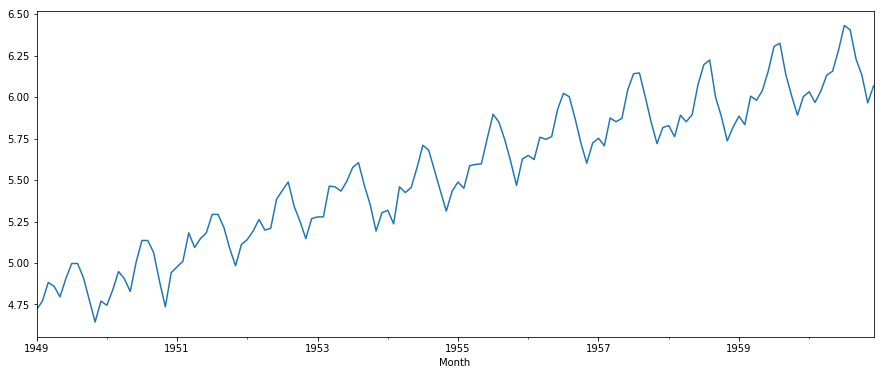

In [ ]:
time_log = np.log(d)
time_log.plot(kind="line",figsize=(15,6))

# **Tester si c'est un bruit blanc **


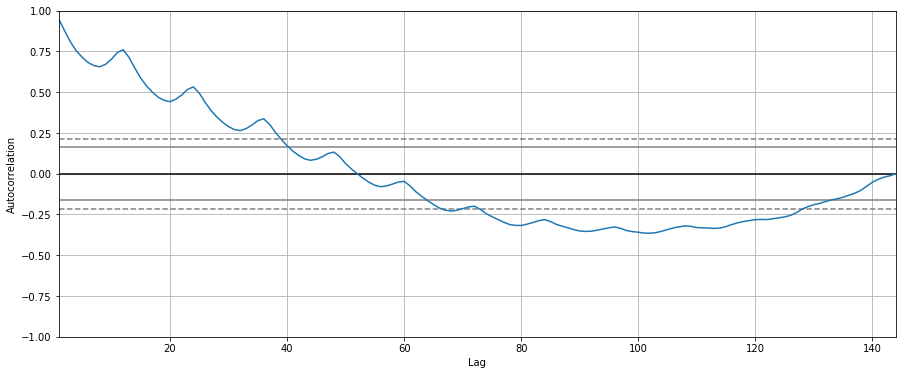

In [ ]:
from pandas import Series
from pandas.plotting import autocorrelation_plot
#from pandas.tools.plotting import autocorrelation_plot
from matplotlib import pyplot
series = Series(data['Passengers'])
# autocorrelation
autocorrelation_plot(series)
pyplot.show()

In [ ]:
# summary stats
print(series.describe())

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64


# **Autocovariance différente de zéro, la série n'est pas un bruit blanc **


# **Décomposer la série temporelle**

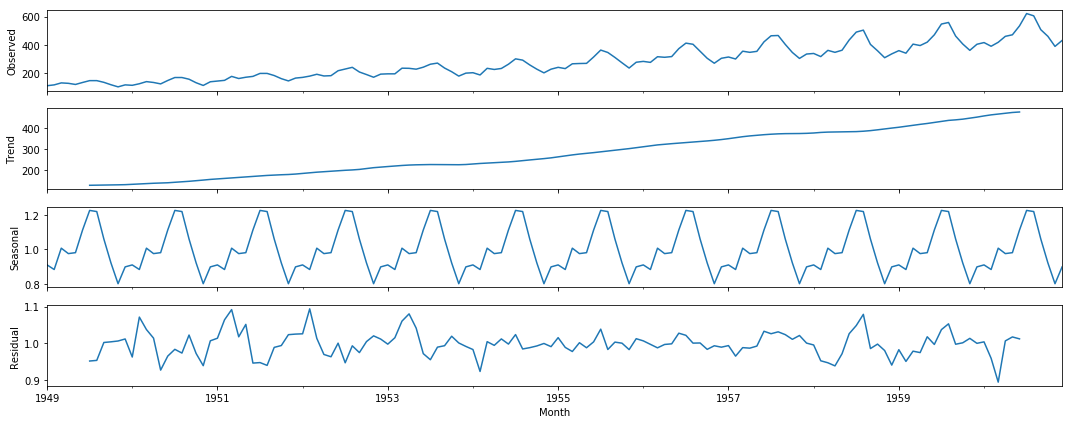

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(series, model='multipplicative')
result.plot()
pyplot.show()

# **Une tendance flagrante,avec une saisonnalité qui décrit bien l'augmentation des nombres de vol dans la haute saison et la baisse sinon,
# C'est clair que la série n'est pas stationnaire car on a une tendance donc les variables statistique (moyenne, variance..) ne sont pas stables**

# **Tester la stationnarité**

In [ ]:
# **Tester la stationnarité**
from statsmodels.tsa.stattools import adfuller
#Perform Dickey-Fuller test:
print( 'Results of Dickey-Fuller Test:')
dftest = adfuller(series, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


# p-value est sup à 0.5, pas de stationnarité on va essayer de rendre la série stationnaire afin d'appliquer es modèles statistiques

# **Utiliser la differenciation**

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: Passengers, dtype: float64
Month
1949-01-01         NaN
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.882802
1949-05-01    4.859812
Name: Passengers, dtype: float64
Month
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
1949-07-01    0.091937
1949-08-01    0.000000
1949-09-01   -0.084557
1949-10-01   -0.133531
1949-11-01   -0.134733
1949-12-01    0.126294
1950-01-01   -0.025752
1950-02-01    0.091350
1950-03-01    0.112478
1950-04-01   -0.043485
1950-05-01   -0.076961
1950-06-01    0.175633
1950-07-01    0.131852
1950-08-01    0.000000
1950-09-01   -0.073203
1950-10-01   -0.172246
1950-11-01   -0.154151
1950-12-01    0.205444
1951-01-01    0.035091
1951-02-01    0.033902
1951-03-01    0.171148
1951-04-01   -0.088033
1951-05-01    0.053744
1951-06-01    0.034

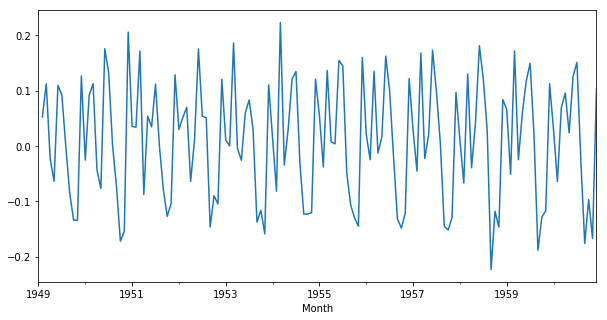

In [ ]:
print(time_log.head())
print(time_log.shift().head())


time_log_diff = time_log - time_log.shift()
print(time_log_diff)
time_log_diff.plot(kind="line",figsize=(10,5))

# **Ducky-Fuller test for stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series
from matplotlib import pyplot
# Supprimer la première ligne de time_log_diff car le test de ducky-fuller n'accepte pas les nan val
s = time_log_diff.iloc[1:]
print(s.head())
series1 = Series(s)


#Perform Dickey-Fuller test:
print( 'Results of Dickey-Fuller Test:')
dftest = adfuller(series1, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
Name: Passengers, dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


# **La série devient stationnaire, on peut maintenant utiliser les modèles statistiques de prédiction**

 # **ARIMA with Grid_search**

In [ ]:
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.75)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = sqrt(mean_squared_error(test, predictions))
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
# evaluate parameters
p_values = [0, 1, 2,5]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series1.values, p_values, d_values, q_values)

Best ARIMA(2, 0, 1) RMSE=0.100


predicted=0.115892, expected=0.011834
predicted=0.076193, expected=-0.066894
predicted=0.072773, expected=0.129593
predicted=0.097907, expected=-0.039442
predicted=0.050908, expected=0.042200
predicted=0.065790, expected=0.180943
predicted=0.047562, expected=0.121098
predicted=-0.018587, expected=0.028114
predicted=-0.059036, expected=-0.223144
predicted=-0.059207, expected=-0.118092
predicted=0.035882, expected=-0.146750
predicted=0.084563, expected=0.083511
predicted=0.146286, expected=0.066021
predicted=0.109668, expected=-0.051293
predicted=0.080790, expected=0.171542
predicted=0.102911, expected=-0.024939
predicted=0.038937, expected=0.058841
predicted=0.049451, expected=0.116724
predicted=0.029232, expected=0.149296
predicted=-0.011201, expected=0.019874
predicted=-0.062074, expected=-0.188422
predicted=-0.063904, expected=-0.128914
predicted=0.014381, expected=-0.117169
predicted=0.067139, expected=0.112243
predicted=0.118374, expected=0.029199
predicted=0.073512, expected=-0.06

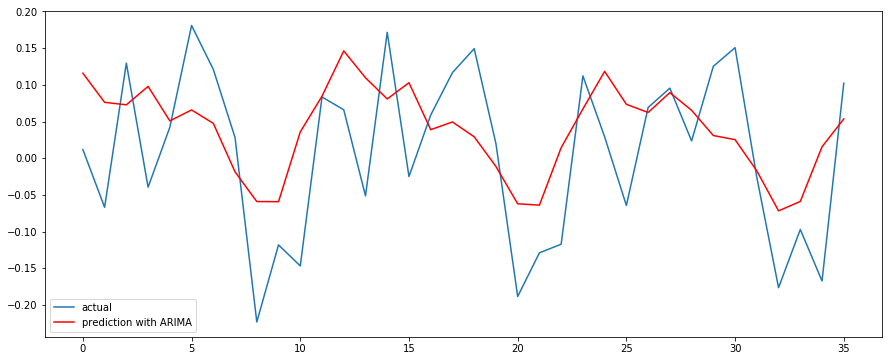

In [ ]:
X = series1.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot
pyplot.plot(test, label='actual')
pyplot.plot(predictions, color='red', label='prediction with ARIMA')
pyplot.legend()

pyplot.show()



# **Deep learning**

In [ ]:
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
data = pd.read_csv('AirPassengers.csv', header=0, index_col=0)
values = data.values

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
data = series_to_supervised(scaled)
print(data)

     var1(t-1)   var1(t)
1     0.015444  0.027027
2     0.027027  0.054054
3     0.054054  0.048263
4     0.048263  0.032819
5     0.032819  0.059846
6     0.059846  0.084942
7     0.084942  0.084942
8     0.084942  0.061776
9     0.061776  0.028958
10    0.028958  0.000000
11    0.000000  0.027027
12    0.027027  0.021236
13    0.021236  0.042471
14    0.042471  0.071429
15    0.071429  0.059846
16    0.059846  0.040541
17    0.040541  0.086873
18    0.086873  0.127413
19    0.127413  0.127413
20    0.127413  0.104247
21    0.104247  0.055985
22    0.055985  0.019305
23    0.019305  0.069498
24    0.069498  0.079151
25    0.079151  0.088803
26    0.088803  0.142857
27    0.142857  0.113900
28    0.113900  0.131274
29    0.131274  0.142857
30    0.142857  0.183398
..         ...       ...
114   0.638996  0.747104
115   0.747104  0.774131
116   0.774131  0.579151
117   0.579151  0.492278
118   0.492278  0.397683
119   0.397683  0.449807
120   0.449807  0.494208
121   0.494208  0.459459


In [ ]:
# split into train and test sets
from sklearn.preprocessing import MinMaxScaler

values = data.values



train1 = values[:100, :]
test1 = values[100:, :]
#creating the train et set de validation
#train = values[:(0.75 * (len (dataset))), :]
#test = values[ (0.75 * (len (dataset))):, :]

# split into input and outputs
train_X, train_y = train1[:, :-1], train1[:, -1]
test_X, test_y = test1[:, :-1], test1[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(100, 1, 1) (100,) (43, 1, 1) (43,)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None
Train on 100 samples, validate on 43 samples
Epoch 1/50
 - 1s - loss: 0.2101 - val_loss: 0.4956
Epoch 2/50
 - 0s - loss: 0.1329 - val_loss: 0.3614
Epoch 3/50
 - 0s - loss: 0.0854 - val_loss: 0.2332
Epoch 4/50
 - 0s - loss: 0.0988 - val_loss: 0.1479
Epoch 5/50
 - 0s - loss: 0.1322 - val_loss: 0.1202
Epoch 6/50
 - 0s - loss: 0.1405 - val_loss: 0.1352
Epoch 7/50
 - 0s - loss: 0.1246 - val_loss: 0.1748
Epoch 8/50
 - 0s - loss: 0.1036 - val_loss: 0.2172
Epoch 9/50
 - 0s - loss: 0.0894 - val_loss: 0.2411
Epoch 10/50
 - 0s - loss:

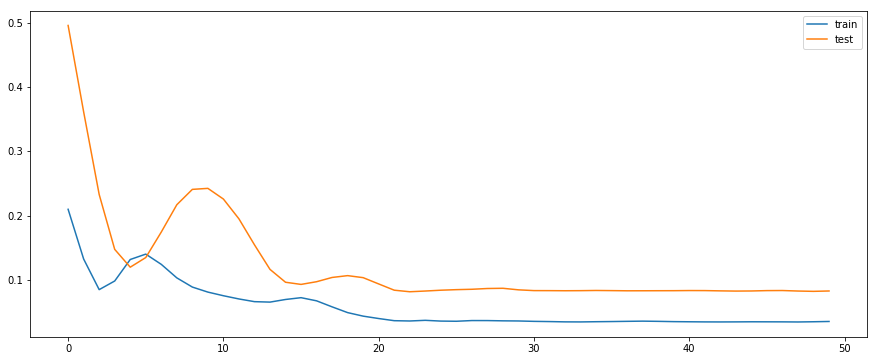

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers

# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
adam = optimizers.adam(lr=0.01,decay=1e-6)
model.compile(loss='mae', optimizer=adam)
print (model.summary())
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))



# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)






Test RMSE: 50.088


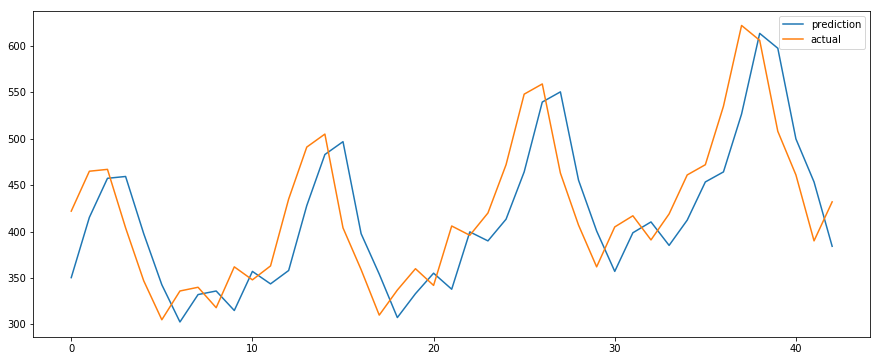

In [ ]:
from matplotlib import pyplot

# plot prediction and actual
pyplot.plot(inv_yhat, label='prediction')
pyplot.plot(inv_y, label='actual')
pyplot.legend()
pyplot.show()

# **Stacked LSTM**

In [ ]:
# define model
model1 = Sequential()
model1.add(LSTM(100,return_sequences=True,input_shape=(train_X.shape[1], train_X.shape[2])))
model1.add(LSTM(100))
model1.add(Dense(1))
model1.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
print (model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 100)            40800     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


Train on 100 samples, validate on 43 samples
Epoch 1/50
 - 2s - loss: 0.2233 - acc: 0.0100 - val_loss: 0.5994 - val_acc: 0.0000e+00
Epoch 2/50
 - 0s - loss: 0.2074 - acc: 0.0100 - val_loss: 0.5761 - val_acc: 0.0000e+00
Epoch 3/50
 - 0s - loss: 0.1905 - acc: 0.0100 - val_loss: 0.5512 - val_acc: 0.0000e+00
Epoch 4/50
 - 0s - loss: 0.1735 - acc: 0.0100 - val_loss: 0.5239 - val_acc: 0.0000e+00
Epoch 5/50
 - 0s - loss: 0.1563 - acc: 0.0100 - val_loss: 0.4939 - val_acc: 0.0000e+00
Epoch 6/50
 - 0s - loss: 0.1396 - acc: 0.0100 - val_loss: 0.4613 - val_acc: 0.0000e+00
Epoch 7/50
 - 0s - loss: 0.1241 - acc: 0.0100 - val_loss: 0.4262 - val_acc: 0.0000e+00
Epoch 8/50
 - 0s - loss: 0.1098 - acc: 0.0100 - val_loss: 0.3889 - val_acc: 0.0000e+00
Epoch 9/50
 - 0s - loss: 0.0995 - acc: 0.0100 - val_loss: 0.3525 - val_acc: 0.0000e+00
Epoch 10/50
 - 0s - loss: 0.0936 - acc: 0.0100 - val_loss: 0.3177 - val_acc: 0.0000e+00
Epoch 11/50
 - 0s - loss: 0.0915 - acc: 0.0100 - val_loss: 0.2847 - val_acc: 0.0000e

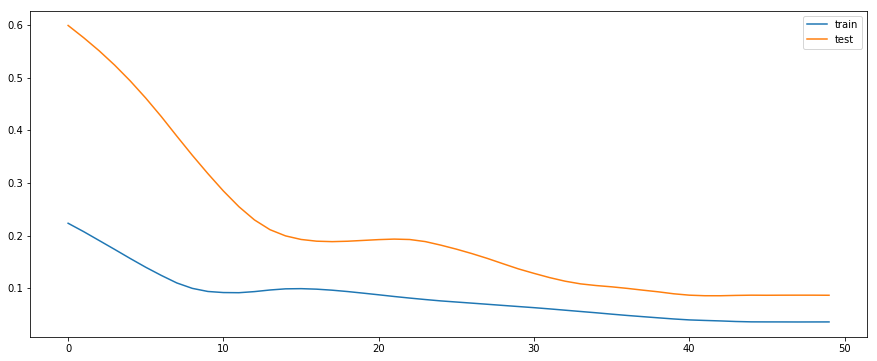

In [ ]:
# fit network
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

history1 = model1.fit(train_X, train_y, epochs=50, batch_size=40, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history1.history['loss'], label='train')
pyplot.plot(history1.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np
#test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))



# make a prediction
yhat1 = model1.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat1 = concatenate((yhat1, test_X[:, 1:]), axis=1)
inv_yhat1 = scaler.inverse_transform(inv_yhat1)
inv_yhat1 = inv_yhat1[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y1 = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y1 = scaler.inverse_transform(inv_y1)
inv_y1 = inv_y1[:,0]
# calculate RMSE
rmse1 = sqrt(mean_squared_error(inv_y1, inv_yhat1))
print('Test RMSE: %.3f' % rmse1)

Test RMSE: 54.083


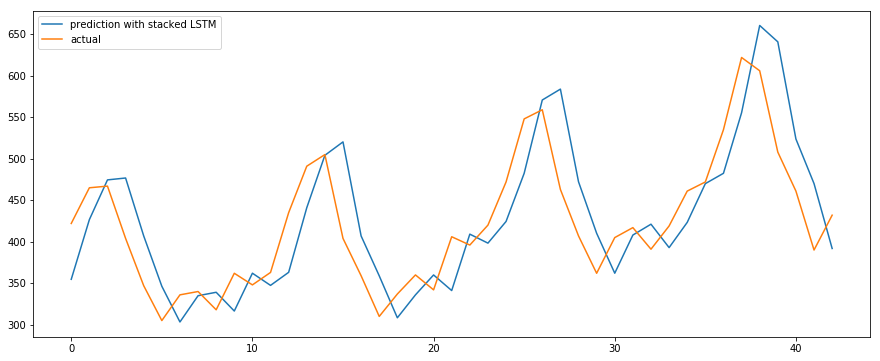

In [ ]:
from matplotlib import pyplot

# plot prediction and actual

pyplot.plot(inv_yhat1, label='prediction with stacked LSTM')
pyplot.plot(inv_y1, label='actual')
pyplot.legend()
pyplot.show()

# **ET si on utilise le même modèle LSTM pour faire la prédiction de T mais non seulement en fonction de T-1, mais aussi en fonction de T-2 et t-3. Est ce que les résultat seront meilleurs ?**

In [ ]:
d = pd.read_csv('AirPassengers.csv', header=0, index_col=0)
values1 = d.values

# ensure all data is float
values1 = values1.astype('float32')
# normalize features
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaled1 = scaler.fit_transform(values1)
data1 = series_to_supervised(scaled1,3,1)
print(data1)

     var1(t-3)  var1(t-2)  var1(t-1)   var1(t)
3     0.015444   0.027027   0.054054  0.048263
4     0.027027   0.054054   0.048263  0.032819
5     0.054054   0.048263   0.032819  0.059846
6     0.048263   0.032819   0.059846  0.084942
7     0.032819   0.059846   0.084942  0.084942
8     0.059846   0.084942   0.084942  0.061776
9     0.084942   0.084942   0.061776  0.028958
10    0.084942   0.061776   0.028958  0.000000
11    0.061776   0.028958   0.000000  0.027027
12    0.028958   0.000000   0.027027  0.021236
13    0.000000   0.027027   0.021236  0.042471
14    0.027027   0.021236   0.042471  0.071429
15    0.021236   0.042471   0.071429  0.059846
16    0.042471   0.071429   0.059846  0.040541
17    0.071429   0.059846   0.040541  0.086873
18    0.059846   0.040541   0.086873  0.127413
19    0.040541   0.086873   0.127413  0.127413
20    0.086873   0.127413   0.127413  0.104247
21    0.127413   0.127413   0.104247  0.055985
22    0.127413   0.104247   0.055985  0.019305
23    0.10424

In [ ]:
# split into train and test sets
from sklearn.preprocessing import MinMaxScaler

val = data1.values



train2 = val[:100, :]
test2 = val[100:, :]
#creating the train et set de validation
#train = values[:(0.75 * (len (dataset))), :]
#test = values[ (0.75 * (len (dataset))):, :]

# split into input and outputs
train_X2, train_y2 = train2[:, :-1], train2[:, -1]
test_X2, test_y2 = test2[:, :-1], test2[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X2 = train_X2.reshape((train_X2.shape[0], 1, train_X2.shape[1]))
test_X2 = test_X2.reshape((test_X2.shape[0], 1, test_X2.shape[1]))
print(train_X2.shape, train_y2.shape, test_X2.shape, test_y2.shape)

(100, 1, 3) (100,) (41, 1, 3) (41,)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               41600     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________
None
Train on 100 samples, validate on 41 samples
Epoch 1/50
 - 1s - loss: 0.2181 - val_loss: 0.4258
Epoch 2/50
 - 0s - loss: 0.1136 - val_loss: 0.2026
Epoch 3/50
 - 0s - loss: 0.0704 - val_loss: 0.1029
Epoch 4/50
 - 0s - loss: 0.1295 - val_loss: 0.1151
Epoch 5/50
 - 0s - loss: 0.1399 - val_loss: 0.1028
Epoch 6/50
 - 0s - loss: 0.1074 - val_loss: 0.1350
Epoch 7/50
 - 0s - loss: 0.0832 - val_loss: 0.1853
Epoch 8/50
 - 0s - loss: 0.0751 - val_loss: 0.2033
Epoch 9/50
 - 0s - loss: 0.0719 - val_loss: 0.1812
Epoch 10/50
 - 0s - loss:

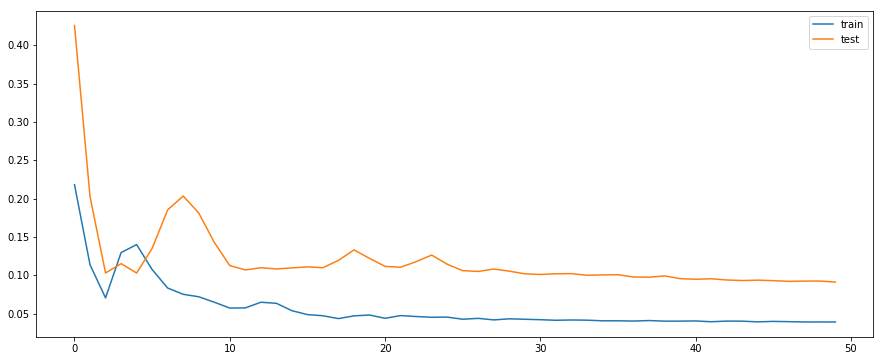

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import optimizers

# design network
model2 = Sequential()
model2.add(LSTM(100, input_shape=(train_X2.shape[1], train_X2.shape[2])))
model2.add(Dense(1))
adam = optimizers.adam(lr=0.01,decay=1e-6)
model2.compile(loss='mae', optimizer=adam)
print (model2.summary())
# fit network
history2 = model2.fit(train_X2, train_y2, epochs=50, batch_size=70, validation_data=(test_X2, test_y2), verbose=2, shuffle=False)
# plot history
pyplot.plot(history2.history['loss'], label='train')
pyplot.plot(history2.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error
import numpy as np
#test_X2= np.reshape(test_X2, (test_X2.shape[0], 1, test_X2.shape[1]))



# make a prediction
yhat2 = model2.predict(test_X2)
test_X2 = test_X2.reshape((test_X2.shape[0], test_X2.shape[2]))
# invert scaling for forecast
inv_yhat2 = concatenate((yhat2, test_X2[:, 1:]), axis=1)
inv_yhat2 = scaler.inverse_transform(inv_yhat2)
inv_yhat2 = inv_yhat2[:,0]
# invert scaling for actual
test_y2 = test_y2.reshape((len(test_y2), 1))
inv_y2 = concatenate((test_y2, test_X2[:, 1:]), axis=1)
inv_y2 = scaler.inverse_transform(inv_y2)
inv_y2 = inv_y2[:,0]
# calculate RMSE
rmse2 = sqrt(mean_squared_error(inv_y2, inv_yhat2))
print('Test RMSE: %.3f' % rmse2)

Test RMSE: 61.035


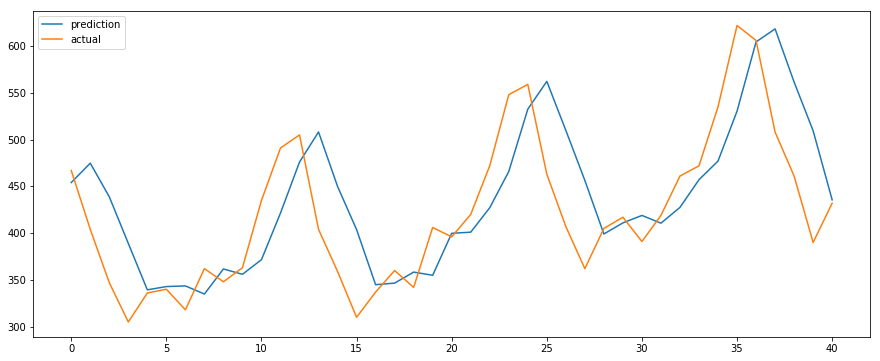

In [ ]:
from matplotlib import pyplot

# plot prediction and actual
pyplot.plot(inv_yhat2, label='prediction')
pyplot.plot(inv_y2, label='actual')
pyplot.legend()
pyplot.show()

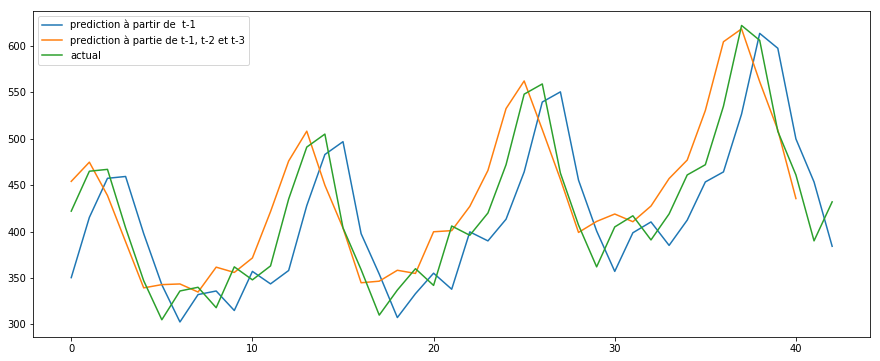

In [ ]:
from matplotlib import pyplot

# plot prediction and actual
pyplot.plot(inv_yhat, label='prediction à partir de  t-1')

pyplot.plot(inv_yhat2, label='prediction à partie de t-1, t-2 et t-3')
pyplot.plot(inv_y, label='actual')
pyplot.legend()
pyplot.show()